In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv("phone_data.csv")

In [3]:
df.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


In [5]:
df.isnull().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64

In [6]:
df['Storage '].unique()

array(['128 GB', '256 GB', '64 GB', '32 GB', '128GB', '256GB', '64GB',
       '32GB', '256', '64', '128', '512', '32'], dtype=object)

In [7]:
df['RAM '].unique()

array(['6 GB', '12 GB', '8 GB', '4 GB', '3 GB', '2 GB', '4GB', '8GB',
       '6GB', '12GB', '3GB', '2GB', '5GB', '12', '3', '6', '8', '4', '16',
       '2'], dtype=object)

In [8]:
df.rename(columns={"Storage ":"Storage (GB)","RAM ":"RAM (GB)"},inplace=True)
df.columns = df.columns.str.strip()

In [9]:
df.columns

Index(['Brand', 'Model', 'Storage (GB)', 'RAM (GB)', 'Screen Size (inches)',
       'Camera (MP)', 'Battery Capacity (mAh)', 'Price ($)'],
      dtype='object')

In [10]:
df['Storage (GB)'] = df['Storage (GB)'].str.replace("GB","",regex=True)
df['Storage (GB)'] = df['Storage (GB)'].str.strip()
df['Storage (GB)'] = df['Storage (GB)'].astype(int)

In [11]:
df['Storage (GB)'].unique()

array([128, 256,  64,  32, 512])

In [12]:
df['RAM (GB)'] = df['RAM (GB)'].str.replace("GB","",regex=True)
df['RAM (GB)'] = df['RAM (GB)'].str.strip()
df['RAM (GB)'] = df['RAM (GB)'].astype(int)

In [13]:
df['RAM (GB)'].unique()

array([ 6, 12,  8,  4,  3,  2,  5, 16])

In [14]:
df.head()

,Brand,Model,Storage (GB),RAM (GB),Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128,6,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256,12,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128,8,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128,8,6.4,50 + 12.2,4614,799


In [15]:
df['Screen Size (inches)'].unique()

array(['6.1', '6.8', '6.7', '6.67', '6.4', '6.55', '6.78', '6.43', '6.5',
       '6.62', '5.4', '6.2', '6.51', '6.6', '4.7', '6.58', '6.52', '6.44',
       '6.53', '6.56', '6.8 + 3.9', '4.5', '6.39', '5.9', '5.5', '6.81',
       '5.99', '6.82', '6.3', '6.22', '6', '6.35', '6.9', '6.76', '6.49',
       '6.72', '5.7', '6.47', '7.6 (unfolded)', '6.15', '6.57'],
      dtype=object)

In [16]:
df[df['Screen Size (inches)'] == '6.8 + 3.9']

,Brand,Model,Storage (GB),RAM (GB),Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
88,LG,Wing,256,8,6.8 + 3.9,64MP + 13MP + 12MP,4000,$999


In [17]:
df[df['Screen Size (inches)'] == '7.6 (unfolded)']

,Brand,Model,Storage (GB),RAM (GB),Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
373,Samsung,Galaxy Z Fold2 5G,256,12,7.6 (unfolded),12+12+12,4500,1999


In [18]:
df.drop(index=[88,373],axis=0,inplace=True)
df['Screen Size (inches)'] = df['Screen Size (inches)'].astype(float)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 405 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   405 non-null    object 
 1   Model                   405 non-null    object 
 2   Storage (GB)            405 non-null    int32  
 3   RAM (GB)                405 non-null    int32  
 4   Screen Size (inches)    405 non-null    float64
 5   Camera (MP)             405 non-null    object 
 6   Battery Capacity (mAh)  405 non-null    int64  
 7   Price ($)               405 non-null    object 
dtypes: float64(1), int32(2), int64(1), object(4)
memory usage: 25.3+ KB


In [20]:
df['Camera (MP)'].unique()

array(['12 + 12 + 12', '108 + 10 + 10 + 12', '48 + 50 + 8 + 2',
       '64 + 8 + 5 + 2', '50 + 12.2', '12 + 12', '48 + 8 + 2 + 2',
       '50 + 13 + 16 + 2', '50 + 48 + 12 + 8', '64 + 8 + 2',
       '64 + 12 + 5 + 5', '50 + 50 + 13 + 3', '64 + 8 + 5',
       '64 + 12 + 12', '50 + 2 + 2', '48 + 2 + 2', '50 + 8 + 2 + 2',
       '48 + 5', '48 + 50 + 2', '108 + 8 + 5 + 2', '13 + 2 + 2', '13 + 2',
       '12', '48 + 5 + 2', '50 + 8 + 2', '64 + 8 + 2 + 2', '48 + 8 + 5',
       '64 + 8', '48 + 5 + 2 + 2', '50 + 2', '64 + 12 + 8 + 5', '64 + 2',
       '48 + 13 + 13', '12MP + 12MP', '64MP + 12MP + 12MP',
       '50MP + 8MP + 2MP', '50MP + 12MP', '48MP + 8MP + 2MP + 2MP',
       '64MP + 8MP + 2MP', '50MP + 48MP + 12MP + 8MP',
       '50MP + 16MP + 13MP + 2MP', '108MP + 16MP + 8MP', '48MP + 13MP',
       '12MP + 12MP + 12MP', '64MP + 12MP + 8MP', '13MP + 5MP',
       '64MP + 12MP + 8MP + 5MP', '108MP + 8MP + 5MP + 2MP',
       '48MP + 50MP + 2MP', '50MP + 2MP + 2MP', '108MP + 8MP + 2MP',
       '

In [21]:
def camera_count(value):
    return len([x.strip() for x in str(value).split('+') if x.strip()])

df["Camera Count"] = df["Camera (MP)"].apply(camera_count)

In [22]:
def total_MP(camera_str):
    parts = camera_str.split('+')
    total = 0.0
    for part in parts:
        # clean piece: only digit, '.' and ',' kept
        clean_part = re.sub(r'[^\d\.]', '', part)
        try:
            val = float(clean_part)
        except:
            val = 0.0
        total += val
    return total

df["Total MP"] = df["Camera (MP)"].apply(total_MP)

In [23]:
df.drop('Camera (MP)',axis=1,inplace=True)

In [24]:
df.head()

,Brand,Model,Storage (GB),RAM (GB),Screen Size (inches),Battery Capacity (mAh),Price ($),Camera Count,Total MP
0,Apple,iPhone 13 Pro,128,6,6.10,3095,999,3,36.0
1,Samsung,Galaxy S21 Ultra,256,12,6.80,5000,1199,4,140.0
2,OnePlus,9 Pro,128,8,6.70,4500,899,4,108.0
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,5020,279,4,79.0
4,Google,Pixel 6,128,8,6.40,4614,799,2,62.2


In [25]:
df['Battery Capacity (mAh)'].unique()

array([3095, 5000, 4500, 5020, 4614, 2815, 3300, 5160, 2227, 4250, 4000,
       4310, 6000, 3110, 1821, 2942, 4520, 3969, 4352, 4200, 4600, 4300,
       4450, 4630, 3000, 3500, 4950, 5050, 4820, 7000, 4230, 4470, 4100,
       4080, 4400, 4350, 3885, 4850, 2800, 4510, 3174, 2691, 4800, 4115,
       3340, 4160, 3687, 4025], dtype=int64)

In [26]:
df['Price ($)'].unique()

array(['999', '1199', '899', '279', '799', '249', '699', '329', '449',
       '199', '299', '379', '179', '729', '599', '139', '189', '399',
       '259', '159', '229', '499', '129', '529', '369', '1099', '169',
       '99', '459', '239', '1299', '429', '659', '269', '359', '$799 ',
       '$399 ', '$699 ', '$329 ', '$999 ', '$549 ', '$1,299 ', '$899 ',
       '$449 ', '$319 ', '$269 ', '$349 ', '$279 ', '$249 ', '$299 ',
       '$969 ', '$1,199 ', '$149 ', '$139 ', '$99 ', '$199 ', '$169 ',
       '$499 ', '$179 ', '$219 ', '$229 ', '$239 ', '$109 ', '$189 ',
       '$389 ', '$309 ', '$369 ', '$129 ', '$849 ', '$469 ', '$209 ',
       '$119 ', '$339 ', '$429 ', '$159 ', '$379 ', '$289 ', '130', '749',
       '149', '969', '649', '349', '419', '1399', '119', '319', '1049'],
      dtype=object)

In [27]:
df['Price ($)'] = df['Price ($)'].astype(str)
df['Price ($)'] = df['Price ($)'].str.replace("$","",regex=False)
df['Price ($)'] = df['Price ($)'].str.replace(",","",regex=True)
df['Price ($)'] = df['Price ($)'].str.strip()
df['Price ($)'] = df['Price ($)'].astype(int)

In [28]:
df.corr(numeric_only=True)

,Storage (GB),RAM (GB),Screen Size (inches),Battery Capacity (mAh),Price ($),Camera Count,Total MP
Storage (GB),1.000000,0.687255,0.241669,-0.070331,0.710004,0.312768,0.572880
RAM (GB),0.687255,1.000000,0.277060,-0.024609,0.630508,0.343245,0.690017
Screen Size (inches),0.241669,0.277060,1.000000,0.625078,-0.005165,0.460425,0.417098
Battery Capacity (mAh),-0.070331,-0.024609,0.625078,1.000000,-0.406331,0.388551,0.198344
Price ($),0.710004,0.630508,-0.005165,-0.406331,1.000000,0.061821,0.435402
Camera Count,0.312768,0.343245,0.460425,0.388551,0.061821,1.000000,0.548880
Total MP,0.572880,0.690017,0.417098,0.198344,0.435402,0.548880,1.000000


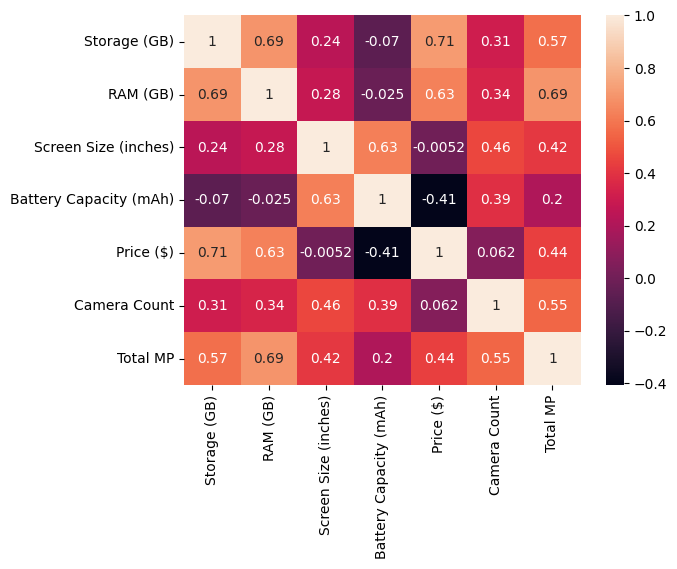

In [29]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

In [30]:
import math

def plot_all_histograms(df, title_prefix=""):
    num_cols = df.select_dtypes(include=[np.number]).columns
    n_cols = 3
    n_rows = math.ceil(len(num_cols) / n_cols)

    plt.figure(figsize=(5 * n_cols, 4 * n_rows))

    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f"{title_prefix}{col}")
        plt.xlabel("")
        plt.ylabel("")
        plt.grid(True)

    plt.tight_layout()
    plt.show()

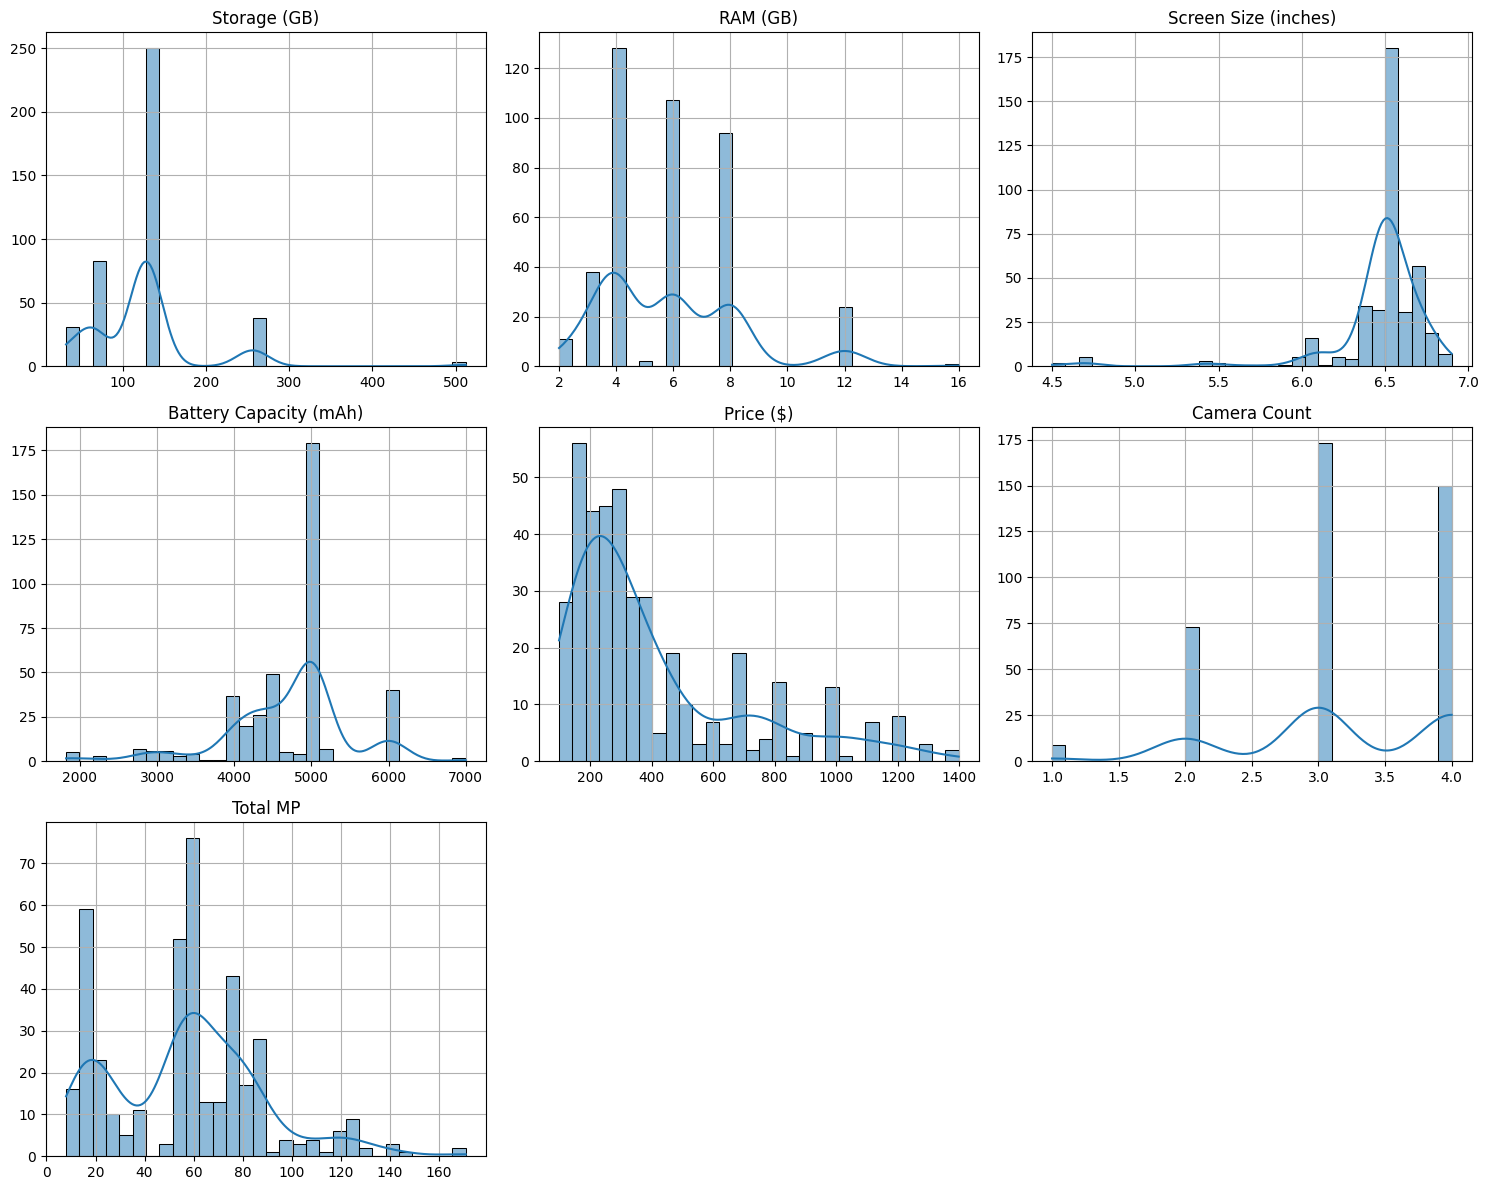

In [31]:
plot_all_histograms(df)

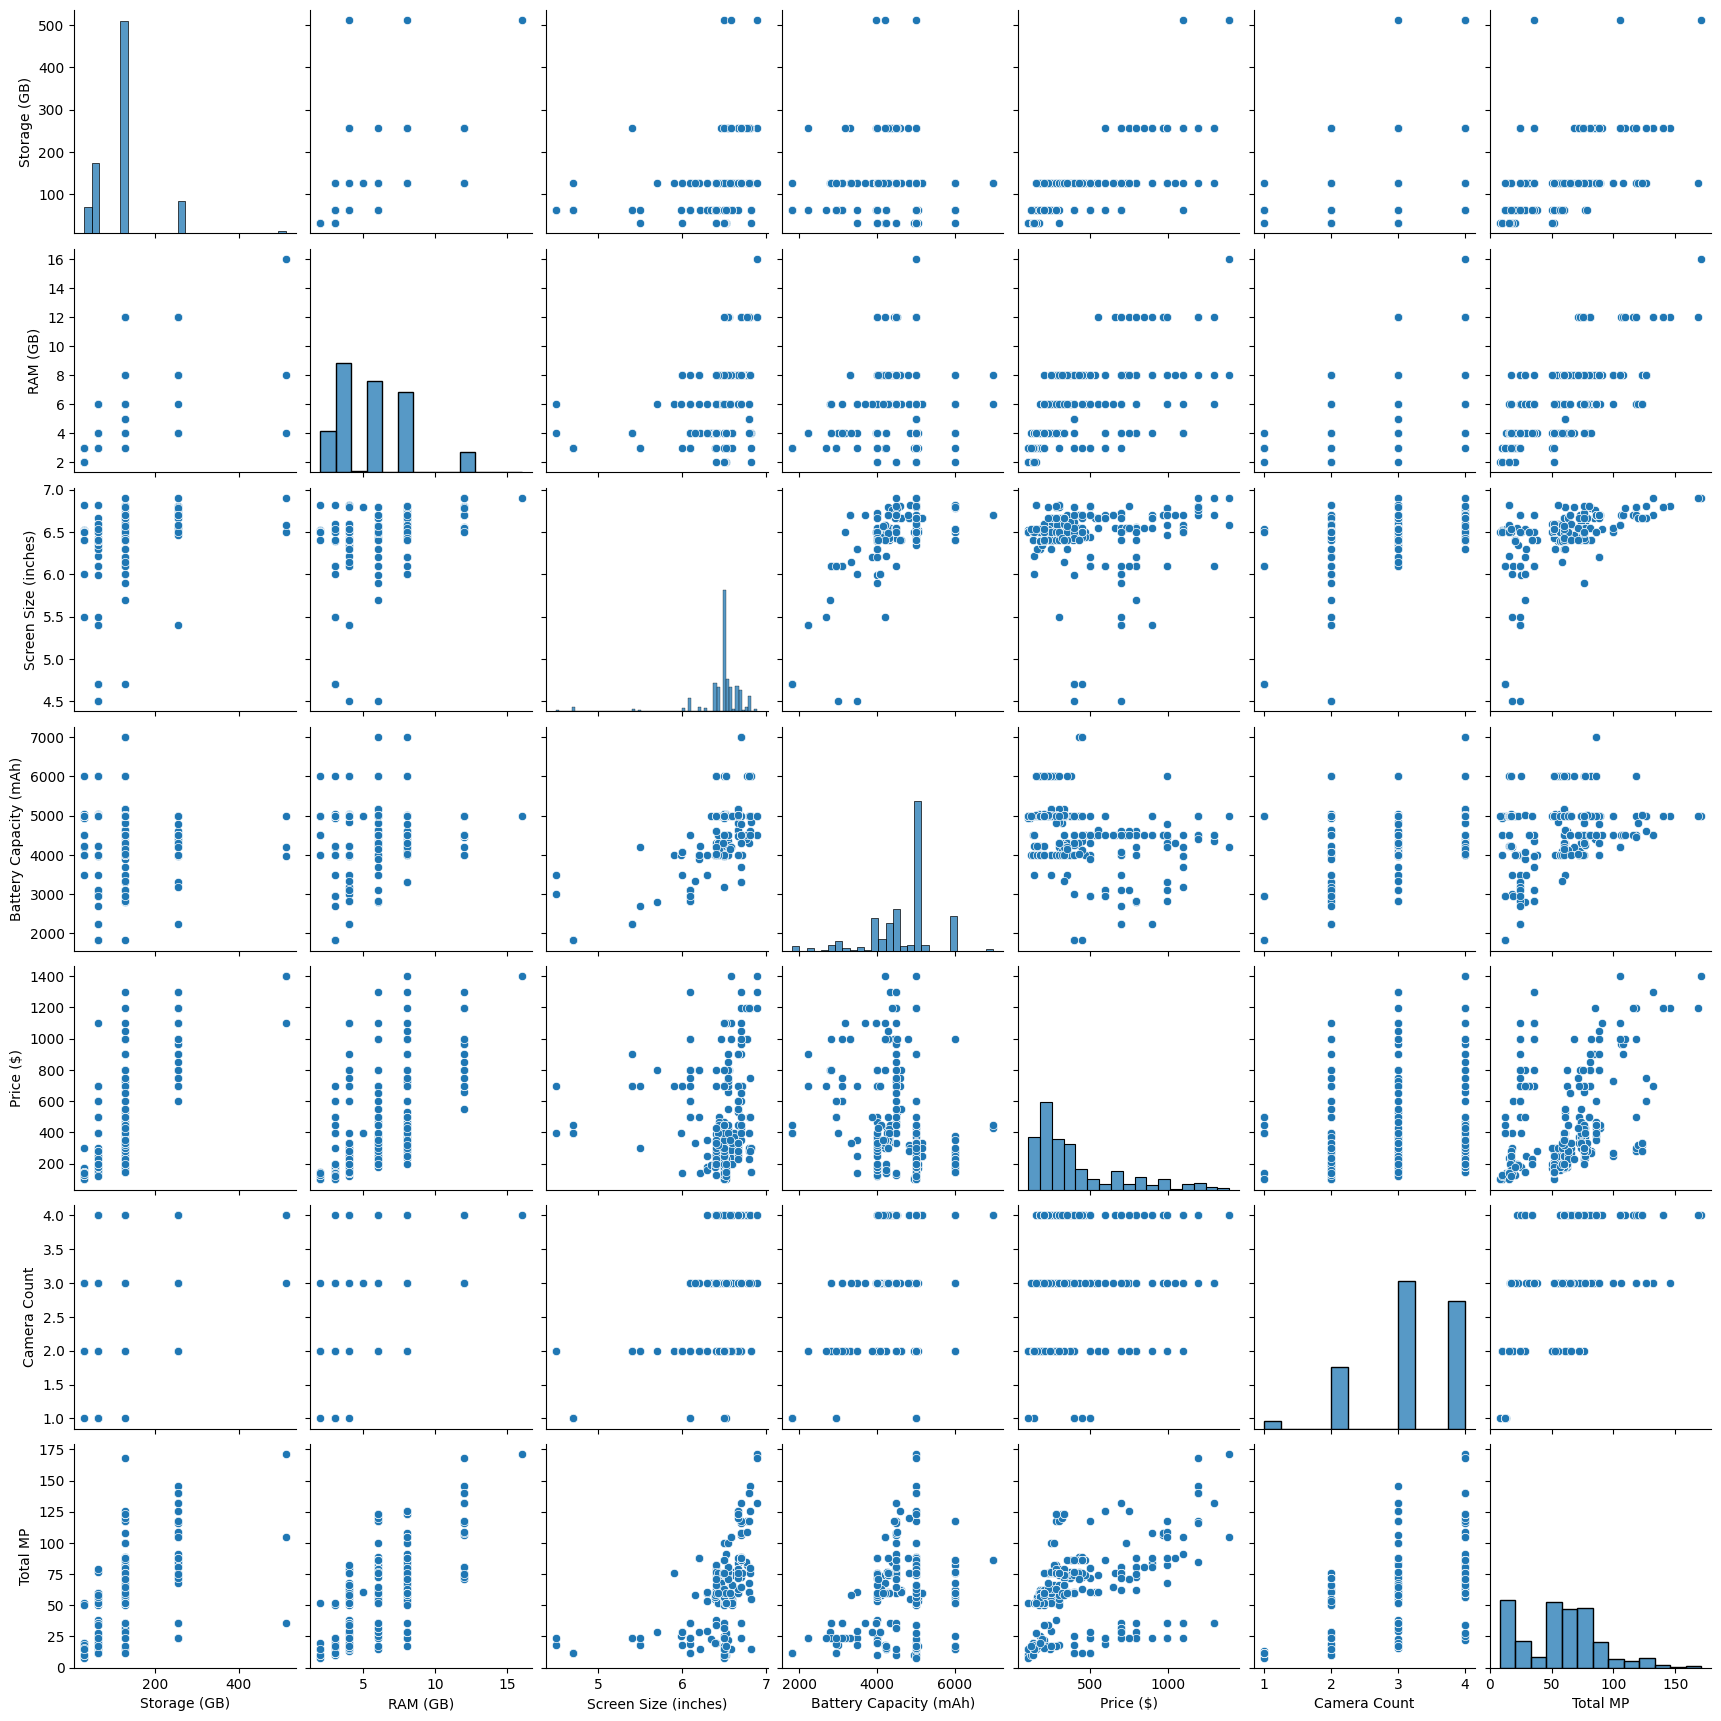

In [32]:
sns.pairplot(df)
plt.show()

In [33]:
df_clean = df.drop(["Brand","Model"],axis=1)

In [34]:
df_clean.head()

,Storage (GB),RAM (GB),Screen Size (inches),Battery Capacity (mAh),Price ($),Camera Count,Total MP
0,128,6,6.10,3095,999,3,36.0
1,256,12,6.80,5000,1199,4,140.0
2,128,8,6.70,4500,899,4,108.0
3,128,6,6.67,5020,279,4,79.0
4,128,8,6.40,4614,799,2,62.2


In [35]:
df_clean.columns

Index(['Storage (GB)', 'RAM (GB)', 'Screen Size (inches)',
       'Battery Capacity (mAh)', 'Price ($)', 'Camera Count', 'Total MP'],
      dtype='object')

In [36]:
X = df_clean.drop("Price ($)",axis=1)
y = df_clean['Price ($)']

In [37]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [38]:
import warnings
warnings.filterwarnings("ignore")

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [40]:
preprocessor = ColumnTransformer(transformers=[
    ("Scaler",StandardScaler(),X_train.columns)
],remainder="passthrough")

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

col_names = preprocessor.get_feature_names_out()

X_train_transformed = pd.DataFrame(data=X_train_transformed,columns=col_names)
X_test_transformed = pd.DataFrame(data=X_test_transformed,columns=col_names)

In [41]:
def calculate_model_metric(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    score = r2_score(true, predicted)
    return mae, rmse, score

In [42]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "Adaboost Regressor" : AdaBoostRegressor(),
    "Gradient Boost Regressor" : GradientBoostingRegressor(),
    "XGBoost Regressor" : XGBRegressor(),
}

In [43]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_transformed, y_train)

    y_train_pred = model.predict(X_train_transformed)
    y_test_pred = model.predict(X_test_transformed)

    model_train_mae, model_train_rmse, model_train_r2 = calculate_model_metric(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = calculate_model_metric(y_test, y_test_pred)

    print(list(models.keys())[i])
    print("Model performance for Training Set")
    print("Root Mean Squared Error: ", model_train_rmse)
    print("Mean Absolute Error: ", model_train_mae)
    print("R2 Score: ", model_train_r2)

    print("-----------------------------------")
    
    print("Model performance for Test Set")
    print("Root Mean Squared Error: ", model_test_rmse)
    print("Mean Absolute Error: ", model_test_mae)
    print("R2 Score: ", model_test_r2)

    print("\n")

Linear Regression
Model performance for Training Set
Root Mean Squared Error:  167.22766849752998
Mean Absolute Error:  125.07114327217467
R2 Score:  0.6787469312254116
-----------------------------------
Model performance for Test Set
Root Mean Squared Error:  137.93409305094212
Mean Absolute Error:  105.36012818702011
R2 Score:  0.7126593461558006


Lasso
Model performance for Training Set
Root Mean Squared Error:  167.25361649661016
Mean Absolute Error:  124.87451922753903
R2 Score:  0.6786472285729871
-----------------------------------
Model performance for Test Set
Root Mean Squared Error:  137.89633900422538
Mean Absolute Error:  105.37964357030486
R2 Score:  0.7128166210917419


Ridge
Model performance for Training Set
Root Mean Squared Error:  167.22881000936874
Mean Absolute Error:  125.01103351761628
R2 Score:  0.6787425454029439
-----------------------------------
Model performance for Test Set
Root Mean Squared Error:  137.89099802965384
Mean Absolute Error:  105.300377508

In [44]:
rfr_params = {
    "n_estimators":[100,150,200,300,500],
    "max_depth" : [3,5,7],
    "max_features" : ["sqrt","log2",5,3],
    "min_samples_split": [2,3,5]
}
gradient_params = {
    "n_estimators":[100,150,200,300,500],
    "learning_rate" : [0.01,0.1,0.05],
    "max_depth" : [3,5,7],
    "max_features" : ["sqrt","log2","auto",5,3],
    "subsample": [0.5, 0.7, 1.0]
}
xgboost_params = {
    "n_estimators":[100,150,200,300,500],
    "max_depth" : [5,6,9],
    "learning_rate" : [0.01,0.1,0.3],
    "colsample_bytree": [0.6, 0.8, 1.0]
}

In [45]:
randomcv_models = [
    ('GBR',GradientBoostingRegressor(),gradient_params),
    ('RFC',RandomForestRegressor(),rfr_params),
    ('XGBR',XGBRegressor(),xgboost_params)
]

In [46]:
for name,model,params in randomcv_models:
    random_cv=RandomizedSearchCV(estimator=model,param_distributions=params,cv=5,n_iter=50,n_jobs=-1,verbose=1,scoring="r2")
    random_cv.fit(X_train_transformed,y_train)

    print(f"Best parameter for {name} is {random_cv.best_params_}","\n")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameter for GBR is {'subsample': 0.7, 'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 7, 'learning_rate': 0.05} 

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameter for RFC is {'n_estimators': 500, 'min_samples_split': 2, 'max_features': 'log2', 'max_depth': 7} 

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameter for XGBR is {'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.6} 



In [47]:
models = {
    "Gradient Boost Regressor" : GradientBoostingRegressor(n_estimators=100,
                                                           subsample=0.5,
                                                           max_features="sqrt",
                                                           max_depth=7,
                                                           learning_rate=0.1),
    "Random Forest Regressor" : RandomForestRegressor(n_estimators= 300, 
                                                      min_samples_split= 3, 
                                                      max_features= 'sqrt', 
                                                      max_depth= 7),
    "XGBosst Regressor" : XGBRegressor(n_estimators=150,
                                       max_depth=5,
                                       learning_rate=0.1,
                                       colsample_bytree=0.6)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_transformed,y_train)
    
    y_train_pred = model.predict(X_train_transformed)
    y_test_pred = model.predict(X_test_transformed)

    model_train_mae, model_train_rmse, model_train_r2 = calculate_model_metric(y_train,y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = calculate_model_metric(y_test,y_test_pred)

    print(list(models.values())[i])

    print("Evaluation for Training Set")
    print("RMSE :", model_train_rmse)
    print("Mean Absolute Error :", model_train_mae)
    print("R2 Score :", model_train_r2)

    print("-----------------------------")
    
    print("Evaluation for Test Set")
    print("RMSE :", model_test_rmse)
    print("Mean Absolute Error :", model_test_mae)
    print("R2 Score :", model_test_r2)

    print("-----------------------------")
    print("\n")

GradientBoostingRegressor(max_depth=7, max_features='sqrt', subsample=0.5)
Evaluation for Training Set
RMSE : 20.28728338491733
Mean Absolute Error : 12.95789292155551
R2 Score : 0.9952719854240872
-----------------------------
Evaluation for Test Set
RMSE : 90.97765265079374
Mean Absolute Error : 57.37672142508184
R2 Score : 0.8749961805677374
-----------------------------


RandomForestRegressor(max_depth=7, max_features='sqrt', min_samples_split=3,
                      n_estimators=300)
Evaluation for Training Set
RMSE : 66.55946277406714
Mean Absolute Error : 43.750540341029144
R2 Score : 0.9491078696127758
-----------------------------
Evaluation for Test Set
RMSE : 83.14050296072429
Mean Absolute Error : 56.114306338270545
R2 Score : 0.8956051382953691
-----------------------------


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
  

In [48]:
from sklearn.model_selection import GridSearchCV

rfr_params = {
    "n_estimators":[100,150,200,300,500],
    "max_depth" : [3,5,7],
    "max_features" : ["sqrt","log2",5,3],
    "min_samples_split": [2,3,5]
}
gradient_params = {
    "n_estimators":[100,150,200,300,500],
    "learning_rate" : [0.01,0.1,0.05],
    "max_depth" : [3,5,7],
    "max_features" : ["sqrt","log2","auto",5,3],
    "subsample": [0.5, 0.7, 1.0]

}
xgboost_params = {
    "n_estimators":[100,150,200,300,500],
    "max_depth" : [5,6,9],
    "learning_rate" : [0.01,0.1,0.3],
    "colsample_bytree": [0.6, 0.8, 1.0]
}

gridcv_models = [
    ('GBR',GradientBoostingRegressor(),gradient_params),
    ('RFC',RandomForestRegressor(),rfr_params),
    ('XGBR',XGBRegressor(),xgboost_params)
]

for name,model,params in gridcv_models:
    grid_cv=GridSearchCV(estimator=model,param_grid=params,cv=5,n_jobs=-1,verbose=1,scoring="r2")
    grid_cv.fit(X_train_transformed,y_train)

    print(f"Best parameter for {name} is {grid_cv.best_params_}","\n")

Fitting 5 folds for each of 675 candidates, totalling 3375 fits
Best parameter for GBR is {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 150, 'subsample': 0.7} 

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameter for RFC is {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100} 

Fitting 5 folds for each of 135 candidates, totalling 675 fits
Best parameter for XGBR is {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 500} 



In [100]:
models = {
    "Gradient Boost Regressor" : GradientBoostingRegressor(n_estimators=150,
                                                           subsample=0.7,
                                                           max_features="sqrt",
                                                           max_depth=5,
                                                           learning_rate=0.05),
    "Random Forest Regressor" : RandomForestRegressor(n_estimators= 100, 
                                                      min_samples_split= 2, 
                                                      max_features= 'sqrt', 
                                                      max_depth= 7),
    "XGBosst Regressor" : XGBRegressor(n_estimators=500,
                                       max_depth=9,
                                       learning_rate=0.01,
                                       colsample_bytree=0.6)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_transformed,y_train)
    
    y_train_pred = model.predict(X_train_transformed)
    y_test_pred = model.predict(X_test_transformed)

    model_train_mae, model_train_rmse, model_train_r2 = calculate_model_metric(y_train,y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = calculate_model_metric(y_test,y_test_pred)

    print(list(models.values())[i])

    print("Evaluation for Training Set")
    print("RMSE :", model_train_rmse)
    print("Mean Absolute Error :", model_train_mae)
    print("R2 Score :", model_train_r2)

    print("-----------------------------")
    
    print("Evaluation for Test Set")
    print("RMSE :", model_test_rmse)
    print("Mean Absolute Error :", model_test_mae)
    print("R2 Score :", model_test_r2)
    print()

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, max_features='sqrt',
                          n_estimators=150, subsample=0.7)
Evaluation for Training Set
RMSE : 31.919054934054063
Mean Absolute Error : 23.67051462174801
R2 Score : 0.9882960875705125
-----------------------------
Evaluation for Test Set
RMSE : 89.19966247847562
Mean Absolute Error : 56.60473677245173
R2 Score : 0.8798343747577414

RandomForestRegressor(max_depth=7, max_features='sqrt')
Evaluation for Training Set
RMSE : 64.83417088560853
Mean Absolute Error : 42.708915300039365
R2 Score : 0.951712031142035
-----------------------------
Evaluation for Test Set
RMSE : 84.48054618512077
Mean Absolute Error : 57.604692393064106
R2 Score : 0.8922127841033739

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feat

In [104]:
model = RandomForestRegressor(n_estimators= 100,
                              min_samples_split= 2,
                              max_features= 'sqrt',
                              max_depth= 7)
model.fit(X_train_transformed,y_train)
y_pred = model.predict(X_test_transformed)
print(r2_score(y_test,y_pred))

0.888567244734514


In [106]:
import pickle

In [ ]:
with open("phone_price.pkl","wb") as f:
    pickle.dump({
        "model":model,
        "preprocessor":preprocessor
    })